<a href="https://colab.research.google.com/github/AchiengMary/Large_language_models/blob/main/DSAIC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data  SampleSubmission.csv  test.zip  train.zip


In [2]:
!mkdir -p /content/train /content/test

In [3]:
!unzip "train.zip" -d "/content/train/"
!unzip "test.zip" -d "/content/test/"

Archive:  train.zip
  inflating: /content/train/client_train.csv  
  inflating: /content/train/invoice_train.csv  
Archive:  test.zip
  inflating: /content/test/client_test.csv  
  inflating: /content/test/invoice_test.csv  


In [4]:
!ls /content/train/
!ls /content/test/

client_train.csv  invoice_train.csv
client_test.csv  invoice_test.csv


In [5]:
import pandas as pd

# Training data
client_train = pd.read_csv('/content/train/client_train.csv')
invoice_train = pd.read_csv('/content/train/invoice_train.csv')

# Testing data
client_test = pd.read_csv('/content/test/client_test.csv')
invoice_test = pd.read_csv('/content/test/invoice_test.csv')

submission_data = pd.read_csv('/content/SampleSubmission.csv')

# Preview data
print("Client Train Data Preview:\n", client_train.head())
print("Invoice Train Data Preview:\n", invoice_train.head())
print("Client Test Data Preview:\n", client_test.head())
print("Invoice Test Data Preview:\n", invoice_test.head())
print("Submission Data Preview:\n", submission_data.head())

<ipython-input-5-fec071faddbf>:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv('/content/train/invoice_train.csv')


Client Train Data Preview:
    disrict          client_id  client_catg  region creation_date  target
0       60     train_Client_0           11     101    31/12/1994     0.0
1       69     train_Client_1           11     107    29/05/2002     0.0
2       62    train_Client_10           11     301    13/03/1986     0.0
3       69   train_Client_100           11     105    11/07/1996     0.0
4       62  train_Client_1000           11     303    14/10/2014     0.0
Invoice Train Data Preview:
         client_id invoice_date  tarif_type  counter_number counter_statue  \
0  train_Client_0   2014-03-24          11         1335667              0   
1  train_Client_0   2013-03-29          11         1335667              0   
2  train_Client_0   2015-03-23          11         1335667              0   
3  train_Client_0   2015-07-13          11         1335667              0   
4  train_Client_0   2016-11-17          11         1335667              0   

   counter_code  reading_remarque  counter

In [6]:
print("Client Train Shape:", client_train.shape)
print("Invoice Train Shape:", invoice_train.shape)
print("Client Test Shape:", client_test.shape)
print("Invoice Test Shape:", invoice_test.shape)

Client Train Shape: (135493, 6)
Invoice Train Shape: (4476749, 16)
Client Test Shape: (58069, 5)
Invoice Test Shape: (1939730, 16)


In [7]:
print("Missing Values in Client Train:\n", client_train.isnull().sum())
print("Missing Values in Invoice Train:\n", invoice_train.isnull().sum())
print("Missing Values in Client Test:\n", client_test.isnull().sum())
print("Missing Values in Invoice Test:\n", invoice_test.isnull().sum())

Missing Values in Client Train:
 disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64
Missing Values in Invoice Train:
 client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64
Missing Values in Client Test:
 disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
dtype: int64
Missing Values in Invoice Test:
 client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient   

In [8]:
print("Client Train Data Types:\n", client_train.dtypes)
print("Invoice Train Data Types:\n", invoice_train.dtypes)

Client Train Data Types:
 disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object
Invoice Train Data Types:
 client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object


In [9]:
print("Client Train Unique IDs:", client_train['client_id'].nunique())
print("Invoice Train Unique IDs:", invoice_train['client_id'].nunique())

Client Train Unique IDs: 135493
Invoice Train Unique IDs: 135493


In [10]:
print("Client Train Summary:\n", client_train.describe())
print("Invoice Train Summary:\n", invoice_train.describe())

Client Train Summary:
              disrict    client_catg         region         target
count  135493.000000  135493.000000  135493.000000  135493.000000
mean       63.511222      11.512506     206.159809       0.055841
std         3.354400       4.423761     104.207044       0.229614
min        60.000000      11.000000     101.000000       0.000000
25%        62.000000      11.000000     103.000000       0.000000
50%        62.000000      11.000000     107.000000       0.000000
75%        69.000000      11.000000     307.000000       0.000000
max        69.000000      51.000000     399.000000       1.000000
Invoice Train Summary:
          tarif_type  counter_number  counter_code  reading_remarque  \
count  4.476749e+06    4.476749e+06  4.476749e+06      4.476749e+06   
mean   2.012804e+01    1.230587e+11  1.724884e+02      7.321702e+00   
std    1.347256e+01    1.657267e+12  1.338871e+02      1.571654e+00   
min    8.000000e+00    0.000000e+00  0.000000e+00      5.000000e+00   
25% 

In [11]:
# Merge datasets
train_data = pd.merge(invoice_train, client_train, on='client_id', how='inner')

# Check merged dataset
print("Merged Train Data Shape:", train_data.shape)
print("Merged Train Data Columns:\n", train_data.columns)

Merged Train Data Shape: (4476749, 21)
Merged Train Data Columns:
 Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'disrict', 'client_catg',
       'region', 'creation_date', 'target'],
      dtype='object')


In [12]:
test_data = pd.merge(invoice_test, client_test, on='client_id', how='inner')

# Check the shape of the merged datasets
print("Merged Test Data Shape:", test_data.shape)

Merged Test Data Shape: (1939730, 20)


In [13]:
print("Merged Train Data Columns:\n", train_data.columns)

Merged Train Data Columns:
 Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'disrict', 'client_catg',
       'region', 'creation_date', 'target'],
      dtype='object')


In [14]:
# One-hot encode categorical columns in both train and test datasets
train_data_encoded = pd.get_dummies(train_data, columns=['disrict', 'region', 'client_catg'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=['disrict', 'region', 'client_catg'], drop_first=True)

# Align columns in both datasets (train and test must have the same columns)
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='left', axis=1)

# Fill missing columns in the test data with zeros
test_data_encoded.fillna(0, inplace=True)

# Verify the column names to ensure both datasets have the same columns
print("Train Data Columns:", train_data_encoded.columns)
print("Test Data Columns:", test_data_encoded.columns)

Train Data Columns: Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'creation_date', 'target',
       'disrict_62', 'disrict_63', 'disrict_69', 'region_103', 'region_104',
       'region_105', 'region_106', 'region_107', 'region_199', 'region_206',
       'region_301', 'region_302', 'region_303', 'region_304', 'region_305',
       'region_306', 'region_307', 'region_308', 'region_309', 'region_310',
       'region_311', 'region_312', 'region_313', 'region_371', 'region_372',
       'region_379', 'region_399', 'client_catg_12', 'client_catg_51'],
      dtype='object')
Test Data Columns: Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque'

In [15]:
# Drop the target column from the test dataset (it only exists in the training dataset)
test_data_encoded = test_data_encoded.drop(columns=['target'], errors='ignore')

In [17]:
print("Train Data Columns:", train_data_encoded.columns)
print("Test Data Columns:", test_data_encoded.columns)

Train Data Columns: Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'creation_date', 'target',
       'disrict_62', 'disrict_63', 'disrict_69', 'region_103', 'region_104',
       'region_105', 'region_106', 'region_107', 'region_199', 'region_206',
       'region_301', 'region_302', 'region_303', 'region_304', 'region_305',
       'region_306', 'region_307', 'region_308', 'region_309', 'region_310',
       'region_311', 'region_312', 'region_313', 'region_371', 'region_372',
       'region_379', 'region_399', 'client_catg_12', 'client_catg_51'],
      dtype='object')
Test Data Columns: Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque'

In [18]:
# Convert 'creation_date' and 'invoice_date' to datetime
train_data_encoded['creation_date'] = pd.to_datetime(train_data_encoded['creation_date'])
test_data_encoded['creation_date'] = pd.to_datetime(test_data_encoded['creation_date'])

train_data_encoded['invoice_date'] = pd.to_datetime(train_data_encoded['invoice_date'])
test_data_encoded['invoice_date'] = pd.to_datetime(test_data_encoded['invoice_date'])

# Extract additional features from the dates
train_data_encoded['creation_year'] = train_data_encoded['creation_date'].dt.year
test_data_encoded['creation_year'] = test_data_encoded['creation_date'].dt.year

train_data_encoded['invoice_year'] = train_data_encoded['invoice_date'].dt.year
test_data_encoded['invoice_year'] = test_data_encoded['invoice_date'].dt.year

train_data_encoded['invoice_month'] = train_data_encoded['invoice_date'].dt.month
test_data_encoded['invoice_month'] = test_data_encoded['invoice_date'].dt.month

# Drop the original date columns if you no longer need them
train_data_encoded.drop(columns=['creation_date', 'invoice_date'], inplace=True)
test_data_encoded.drop(columns=['creation_date', 'invoice_date'], inplace=True)

<ipython-input-18-02ff078130f5>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data_encoded['creation_date'] = pd.to_datetime(train_data_encoded['creation_date'])
<ipython-input-18-02ff078130f5>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test_data_encoded['creation_date'] = pd.to_datetime(test_data_encoded['creation_date'])


In [19]:
# Split the train data into features (X) and target (y)
X_train = train_data_encoded.drop(columns=['target'])
y_train = train_data_encoded['target']

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


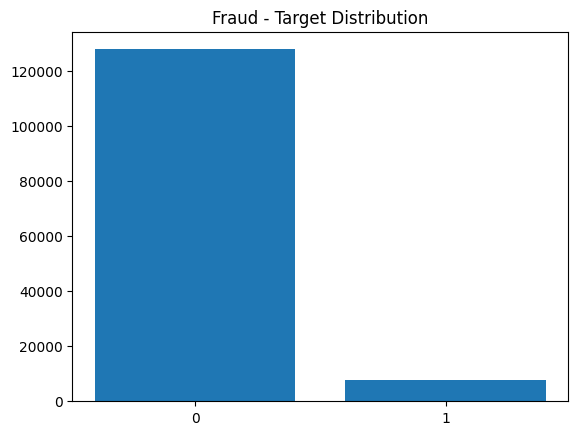

In [21]:
import matplotlib.pyplot as plt
import lightgbm
from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter('ignore')
#Visualize fraudulent activities
fraudactivities = client_train.groupby(['target'])['client_id'].count()
plt.bar(x=fraudactivities.index, height=fraudactivities.values, tick_label = [0,1])
plt.title('Fraud - Target Distribution')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set (the test data doesn't have the target column)
X_test = test_data_encoded
y_pred = model.predict(X_test)

# Since we don't have the target for the test set, you can evaluate the model if you have ground truth
# Example for evaluation:
y_test = test_data['target']  # Uncomment if you have target for the test set
accuracy = accuracy_score(y_test, y_pred)
Print("Accuracy:", accuracy)

ValueError: could not convert string to float: 'train_Client_0'

In [23]:
# Convert 'client_id' to numerical representation before training
X_train['client_id'] = X_train['client_id'].str.replace(r'\D', '', regex=True).astype(int)
X_test['client_id'] = X_test['client_id'].str.replace(r'\D', '', regex=True).astype(int)

# Now, fit the model:
model.fit(X_train, y_train)

NameError: name 'X_test' is not defined

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Convert 'counter_type' to numerical representation using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'counter_type' column in both train and test sets
X_train['counter_type'] = label_encoder.fit_transform(X_train['counter_type'])
X_test['counter_type'] = label_encoder.transform(X_test['counter_type'])

# Now, fit the model:
model.fit(X_train, y_train)

# Make predictions on the test set (the test data doesn't have the target column)
X_test = test_data_encoded.copy()  # Create a copy of test_data_encoded for X_test
y_pred = model.predict(X_test)

# Since we don't have the target for the test set, you can evaluate the model if you have ground truth
# Example for evaluation:
# y_test = test_data['target']  # Uncomment if you have target for the test set
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Convert 'client_id' to numerical representation before training
X_train['client_id'] = X_train['client_id'].str.replace(r'\D', '', regex=True).astype(int)
X_test['client_id'] = X_test['client_id'].str.replace(r'\D', '', regex=True).astype(int)

# Now, fit the model:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'A'

In [25]:
# Convert 'counter_type' to numerical representation using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'counter_type' column in both train and test sets
X_train['counter_type'] = label_encoder.fit_transform(X_train['counter_type'])
X_test['counter_type'] = label_encoder.transform(X_test['counter_type'])

# Now, fit the model:
model.fit(X_train, y_train)

NameError: name 'X_test' is not defined